In [65]:
import pandas as pd
import numpy as np
diabetes =  pd.read_csv("Diabetes.csv", delimiter=",")
diabetes.replace('no data', np.nan, inplace=True)
diabetes.rename(columns={'Numeric':'Diabetes Rate'}, inplace=True)
print(diabetes.columns)
diabetes.dropna(subset=['Country Name'], inplace=True)
diabetes.drop(['Comment', 'Area', 'Cancer Type', 'Unnamed: 11'], axis=1, inplace=True)
print("No data count:\n", diabetes.isna().sum())
print("Avaialble data count:\n", diabetes.notna().sum())

diabetes_total = diabetes[(diabetes['Gender'] == 'Total') & (diabetes["Year"] == 2019)]



Index(['Indicator Name', 'Cancer Type', 'Year', 'Country Name', 'Region',
       'Gender', 'Area', 'Diabetes Rate', 'Lower Confidence Limit',
       'Upper Confidence Limit', 'Comment', 'Unnamed: 11'],
      dtype='object')
No data count:
 Indicator Name               0
Year                         0
Country Name                 0
Region                       0
Gender                       0
Diabetes Rate               78
Lower Confidence Limit    1212
Upper Confidence Limit    1212
dtype: int64
Avaialble data count:
 Indicator Name            1803
Year                      1803
Country Name              1803
Region                    1803
Gender                    1803
Diabetes Rate             1725
Lower Confidence Limit     591
Upper Confidence Limit     591
dtype: int64


In [66]:
physicalinactivity = pd.read_csv("Physical inactivity.csv", delimiter=",")
physicalinactivity.dropna(subset=['Country Name'], inplace=True)
physicalinactivity.drop(['Comment','Cancer Type'], axis=1, inplace=True)
physicalinactivity.rename(columns={'Numeric':'Inactivity Rate'}, inplace=True)
physicalinactivity_total = physicalinactivity[(physicalinactivity['Year'] == 2022) & (physicalinactivity['Gender'] == 'Total')]

In [67]:
spending = pd.read_csv("GHED_data.csv", delimiter=",")
spending = spending[spending['year'] == 2019]
spending = spending[['country','che_gdp']]
spending.dropna(subset=['country'], inplace=True)
spending.rename(columns={'country':'Country Name'}, inplace=True)




/home/viktor/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3306: DtypeWarning: Columns (6,22,23,24,36,38,102,103,104,105,109,110,111,117,119,125,126,127,128,132,133,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,240,241,242,243,244,245,247,248,249,250,251,253,254,255,256,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,

In [68]:
combined_df = pd.merge(diabetes, spending, on='Country Name', how='inner')

final_df = pd.merge(combined_df, physicalinactivity, on='Country Name', how='inner')

print(final_df.columns)


Index(['Indicator Name_x', 'Year_x', 'Country Name', 'Region_x', 'Gender_x',
       'Diabetes Rate', 'Lower Confidence Limit_x', 'Upper Confidence Limit_x',
       'che_gdp', 'Indicator Name_y', 'Year_y', 'Region_y', 'Gender_y', 'Area',
       'Inactivity Rate', 'Lower Confidence Limit_y',
       'Upper Confidence Limit_y', 'Unnamed: 11'],
      dtype='object')


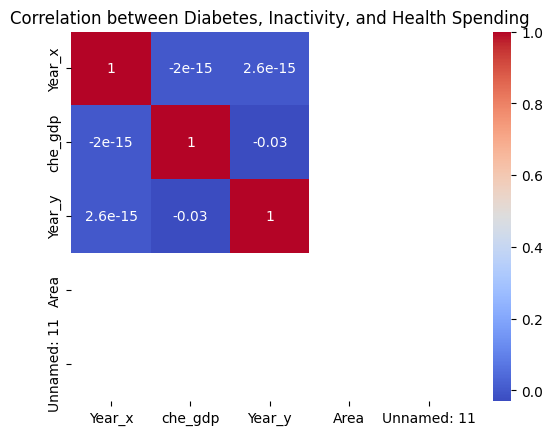

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = final_df.corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Diabetes, Inactivity, and Health Spending")
plt.show()

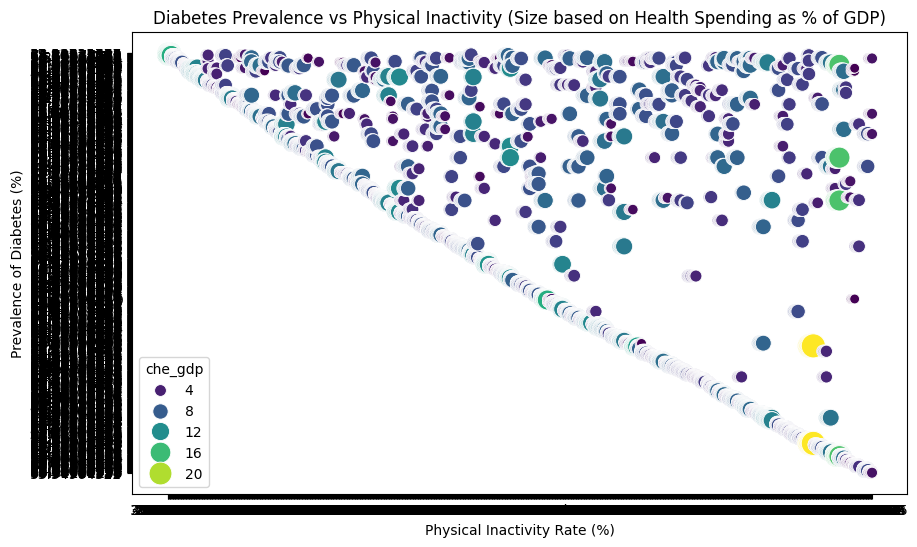

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df, x='Inactivity Rate', y='Diabetes Rate', hue='che_gdp', size='che_gdp', sizes=(50, 300), palette='viridis')
plt.title("Diabetes Prevalence vs Physical Inactivity (Size based on Health Spending as % of GDP)")
plt.xlabel("Physical Inactivity Rate (%)")
plt.ylabel("Prevalence of Diabetes (%)")
plt.show()
